**Partie I**

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# les arrays sont batis avec les dimensions suivantes:
# pluie, arroseur, watson, holmes
# et chaque dimension: faux, vrai

prob_pluie = np.array([0.8, 0.2]).reshape(2, 1, 1, 1)
print("Pr(Pluie)={}\n".format(np.squeeze(prob_pluie)))
prob_arroseur = np.array([0.9, 0.1]).reshape(1, 2, 1, 1)
print("Pr(Arroseur)={}\n".format(np.squeeze(prob_arroseur)))
watson = np.array([[0.8, 0.2], [0, 1]]).reshape(2, 1, 2, 1)
print("Pr(Watson|Pluie)={}\n".format(np.squeeze(watson)))
holmes = np.array([[1, 0],[0.1, 0.9],[0,1], [0, 1]]).reshape(2, 2, 1, 2) #TODO --> Done
print("Pr(Holmes|Pluie,arroseur)={}\n".format(np.squeeze(holmes)))
# prob watson mouille - pluie
print("Pr(W = 1|P = 0) = {}\n".format(np.squeeze(watson[0,:,1,:])))
# prob gazon watson mouille
print("Pr(W = 1) = {:.3f}\n".format(((watson * prob_pluie).sum(0).squeeze()[1])))
# prob gazon holmes mouille si arroseur - pluie
print("Pr(H = 1|A = 1, P = 0) = {}\n".format(holmes[0,1,0,1]))
# prob gazon holmes mouille
print("a) Pr(H = 1) = {:.3f}\n".format(
    (prob_pluie * prob_arroseur * holmes)[:,:,:,1].sum()))
print("b) Pr(H = 1|W = 1) = {:.3f}\n".format(
    ((prob_pluie * prob_arroseur * watson * holmes)[:,:,1,1].sum()) /
    ((prob_pluie * prob_arroseur * watson * holmes)[:,:,1,:].sum())
))
print("c) Pr(H = 1|W = 0) = {:.3f}\n".format(
    ((prob_pluie * prob_arroseur * watson * holmes)[:,:,0,1].sum()) /
    ((prob_pluie * prob_arroseur * watson * holmes)[:,:,0,:].sum())
))
print("d) Pr(H = 1|P = 0, W = 1) = {:.3f}\n".format(
    ((prob_pluie * prob_arroseur * watson * holmes)[0,:,1,1].sum()) /
    ((prob_pluie * prob_arroseur * watson * holmes)[0,:,1,:].sum())
))
print("e) Pr(W = 1|H = 1) = {:.3f}\n".format(
    ((prob_pluie * prob_arroseur * watson * holmes)[:,:,1,1].sum()) /
    ((prob_pluie * prob_arroseur * watson * holmes)[:,:,:,1].sum())
))
print("f) Pr(W = 1|H = 1, A = 1) = {:.3f}\n".format(
    ((prob_pluie * prob_arroseur * watson * holmes)[:,1,1,1].sum()) /
    ((prob_pluie * prob_arroseur * watson * holmes)[:,1,:,1].sum())
))


Pr(Pluie)=[0.8 0.2]

Pr(Arroseur)=[0.9 0.1]

Pr(Watson|Pluie)=[[0.8 0.2]
 [0.  1. ]]

Pr(Holmes|Pluie,arroseur)=[[[1.  0. ]
  [0.1 0.9]]

 [[0.  1. ]
  [0.  1. ]]]

Pr(W = 1|P = 0) = 0.2

Pr(W = 1) = 0.360

Pr(H = 1|A = 1, P = 0) = 0.9

a) Pr(H = 1) = 0.272

b) Pr(H = 1|W = 1) = 0.596

c) Pr(H = 1|W = 0) = 0.090

d) Pr(H = 1|P = 0, W = 1) = 0.090

e) Pr(W = 1|H = 1) = 0.788

f) Pr(W = 1|H = 1, A = 1) = 0.374



**Partie II**

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from sklearn import datasets
from sklearn.model_selection import train_test_split

digits = datasets.load_digits()
X = digits.data

nous utilisons l’astuce de
redéfinir ~xi = [~xTi 1]T

In [0]:
# X = [X]
X_bias = np.concatenate((X,np.ones((X.shape[0], 1))), axis=1) 

In [26]:
X_bias.shape

(1797, 65)

In [0]:
y = digits.target
y_one_hot = np.zeros((y.shape[0], len(np.unique(y))))
y_one_hot[np.arange(y.shape[0]), y] = 1  # one hot target or shape NxK


In [28]:
y_one_hot.shape

(1797, 10)

Splitting dataset

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X_bias, y_one_hot, test_size=0.3, random_state=42)
X_test, X_validation, y_test, y_validation = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [30]:
X_train.shape

(1257, 65)

# **Softmax**

On veut convertir le vecteur de logits **z** obtenu dans la partie précédente, en un **vecteur de probabilité**.

Pour cela on définit la **fonction softmax**:

$$ \hat{p_x}^k = softmax(z)_k = \frac{exp(z_k)}{\sum_{\substack{1<j<K}} exp(z_j)} $$

Intuitivement, pour un logit de z, $z_k$, on prend l'exponentielle de cette valeur et on la divise par la somme des exponentielles de chaque logit du vecteur **z**. On obtient  $\hat{p_x}^k$ la probabilité que l'exemple **x** appartienne à la classe **k**.

On réitère l'opération pour chaque logit du vecteur **z**. 

On obtient ainsi un vecteur de probabilités $\hat{p_x}$ pour un exemple **x**. 

La division permet de rendre la somme des termes du vecteur $\hat{p_x}$ égale à 1 ce qui est indispensable dans le cadre des probabilités.

# **Fonction de coût Log loss**

Soit la fonction de coût log loss (ou cross entropy):

$$ J( \Theta) = \frac{-1}{m}\sum_{\substack{1<i<m}} \sum_{\substack{1<k<K}} y_k^i log( \hat{p_k}^i ) $$

avec:
* **K** le nombre de classes
* **m** le nombre d'exemples dans les données
* $ \hat{p_k}^i  $  la probabilité que l'exemple i soit de la classe k
* $y_k^i$ vaut 1 si la classe cible de l'exemple i est k, 0 sinon

Le coût correspond donc à la moyenne multiplié par -1 des sommes des multiplications des probabilités pour chaque classe pour chaque élement. Autrement dit, plus le coût est petit, plus les prédictions correspondent bien aux étiquettes.


**Détail d'implémentation:** La fonction n'est pas définie pour des valeurs de probabilité de 0 ou 1. Il faut donc s'assurer que étant donné $\epsilon$, les probabilités sont comprises dans [$\epsilon$, 1. - $\epsilon$].

# **Gradient de la fonction de coût**
Le **gradient de J** par rapport à la classe k (par rapport à $\theta_k$) est :


$$ \Delta_{\theta_k}J( \Theta) = \frac{1}{m} \sum_{\substack{1<i<m}}(\tilde y_k^i - \hat y_{pred_k}^i)x^i  $$

avec:
* **K** le nombre de classes
* **m** le nombre d'exemples dans les données
* $ \hat{p_k}^i  $  la probabilité que l'exemple i soit de la classe k
* $y_k^i$ vaut 1 si la classe cible de l'exemple i est k, 0 sinon

Sous **forme matricielle**, on peut écrire le **gradient de J par rapport à $\Theta$**:
$$ \Delta_J( \Theta) = \frac{1}{m} X_{bias}^T *( \hat y_{pred} - \tilde y_{}) $$

avec:
* $\hat{p}$ la matrice de probabilité prédite pour chaque example et pour chaque classe
* $y_{ohe}$ la version one-hot de y
* $X_{bias}^T$  la matrice transposée de $X_{bias}$
* **\*** le produit matriciel

# **Mise à jour des poids**

Quand le gradient a été calculé, il faut mettre à jour les poids avec ces gradients.

$$ \Theta  = \Theta - \gamma \Delta J( \Theta) $$


avec:
* $\Theta$ la matrice de poids, avec $\Theta = [ W\ \ b ] $
* $\gamma$  le taux d'apprentissage
* $\Delta J( \Theta)$ le gradient de $J( \Theta)$ selon $\Theta$


In [0]:
def softmax(x):
    expZ = np.exp(x-np.max(x, axis=1, keepdims=True))
    return np.divide(expZ, np.sum(expZ, axis=1, keepdims=True))

def get_accuracy(X, y, W):
    return np.sum(np.argmax(softmax(X @ W.T), axis=1) == np.argmax(y, axis=1)) / len(y)


def get_grads(y, y_pred, X):
    #return ( y.T - y_pred.T ) @ X # y.T @ X - y_pred.T @ X
    #return np.matmul(y, X.T) - np.matmul(y_pred, X.T)
    return (1/len(y)) * np.dot( (y- y_pred).T, X)


def get_loss(y, y_pred):
    eps=1.0e-5
    y_pred = np.clip(y_pred, eps, 1 - eps) # to prevent dividing by zero
    return (-1 / len(y)) * np.sum(y * np.log(y_pred))

def fit(X_train,y_train,lr,minibatch_size):
    # generate matrix of weights
    W = np.random.normal(0, 0.01, (len(np.unique(y)), X.shape[1]))  # weights of shape KxL 
    Theta = np.random.normal(0, 0.01, (len(np.unique(y)), X.shape[1]+1))  # weights of shape KxL+1 

    best_W = None
    best_theta = None
    best_accuracy = 0
    nb_epochs = 50
    losses_train = []
    losses_val = []
    accuracies = []
    for epoch in range(nb_epochs):
        loss = 0
        accuracy = 0
        grads = []
        #X_prime=np.append(X_train,[1])            
        #Theta=np.append(W, np.ones((10,1)), axis=1)#Theta=[W b] de dimension (10,65)
        #prob_act=softmax(np.dot(Theta,X_prime),axis=0)#y_pred
        for i in range(0, X_train.shape[0], minibatch_size):
            X_train_mini = X_train[i:i + minibatch_size] if (i + minibatch_size < X_train.shape[0]) \
                else X_train[i:X_train.shape[0]]
            y_train_mini = y_train[i:i + minibatch_size] if (i + minibatch_size < X_train.shape[0]) \
                else y_train[i:X_train.shape[0]]
            # feedforward
            y_pred = softmax(np.dot(X_train_mini, Theta.T)) # (y_train_mini * Theta * X_train_mini.T)
            Theta = Theta + lr * get_grads(y_train_mini, y_pred, X_train_mini)
            #W = W + lr * get_grads(y_train_mini, y_pred, X_train_mini)
        # compute the loss on the train set
        loss = get_loss(y_train, softmax(np.dot(X_train, Theta.T)))
        losses_train.append(loss)
        # compute the loss on the validation set
        loss = get_loss(y_validation,softmax(np.dot(X_validation, Theta.T)))
        losses_val.append(loss)
        # compute the accuracy on the validation set
        accuracy = get_accuracy(X_validation,y_validation,Theta)
        accuracies.append(accuracy)
        if accuracy > best_accuracy:
            # select the best parameters based on the validation accuracy
            best_accuracy = accuracy
            best_W = W
            best_theta = Theta
    accuracy_on_unseen_data = get_accuracy(X_test, y_test, best_theta) # get_accuracy(X_test, y_test, best_W)
    print("Accuracy on validation data:{:.10f}\n".format(best_accuracy))
    print("Accuracy on unseen data:{:.10f}\n".format(accuracy_on_unseen_data)) # 0.897506925208
    return losses_train,losses_val, best_theta, best_accuracy


Test Number #1,	 lr: 0.1,	 minibatch_size: 89

Accuracy on validation data:0.9703703704

Accuracy on unseen data:0.9555555556



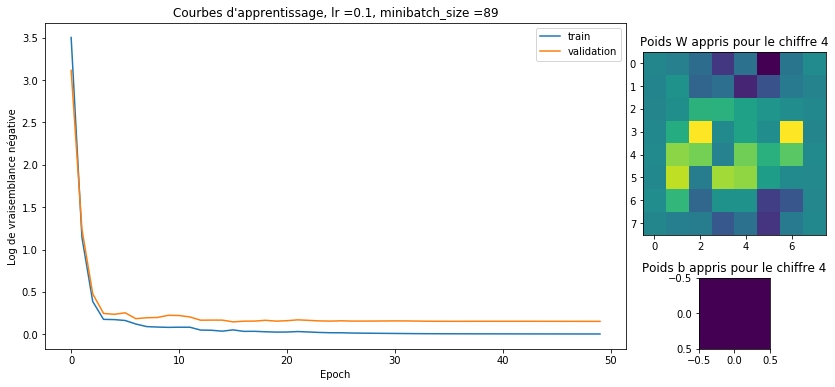

Test Number #2,	 lr: 0.1,	 minibatch_size: 1

Accuracy on validation data:0.9740740741

Accuracy on unseen data:0.9407407407



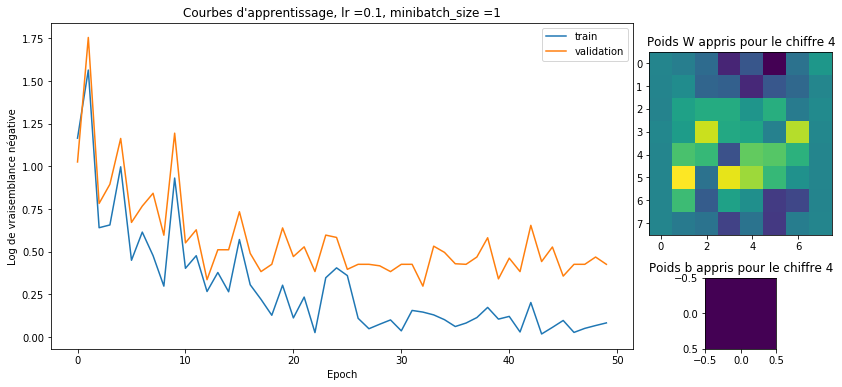

Test Number #3,	 lr: 0.1,	 minibatch_size: 20

Accuracy on validation data:0.9740740741

Accuracy on unseen data:0.9518518519



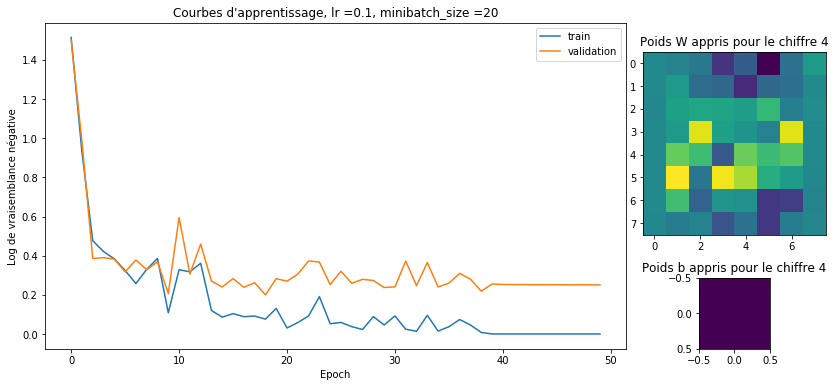

Test Number #4,	 lr: 0.1,	 minibatch_size: 200

Accuracy on validation data:0.9592592593

Accuracy on unseen data:0.9666666667



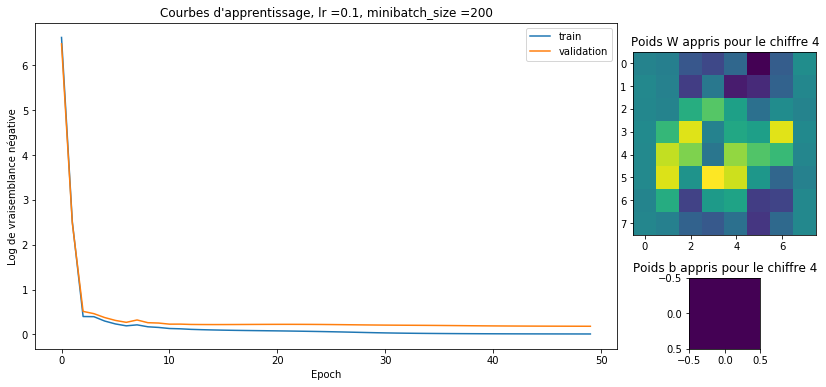

Test Number #5,	 lr: 0.1,	 minibatch_size: 1000

Accuracy on validation data:0.9703703704

Accuracy on unseen data:0.9407407407



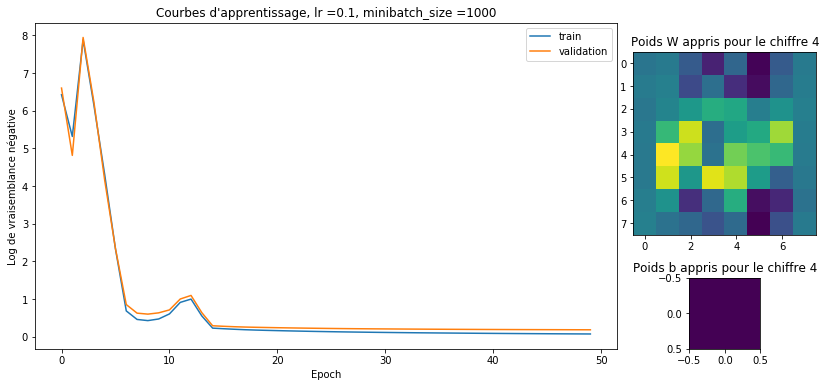

Test Number #6,	 lr: 0.01,	 minibatch_size: 89

Accuracy on validation data:0.9666666667

Accuracy on unseen data:0.9666666667



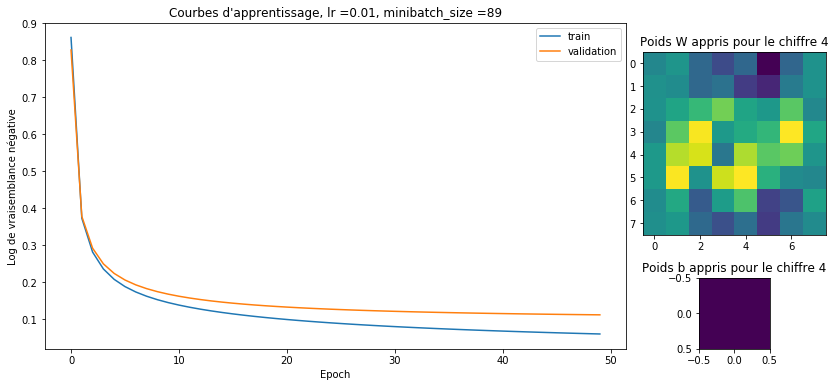

Test Number #7,	 lr: 0.01,	 minibatch_size: 1

Accuracy on validation data:0.9703703704

Accuracy on unseen data:0.9333333333



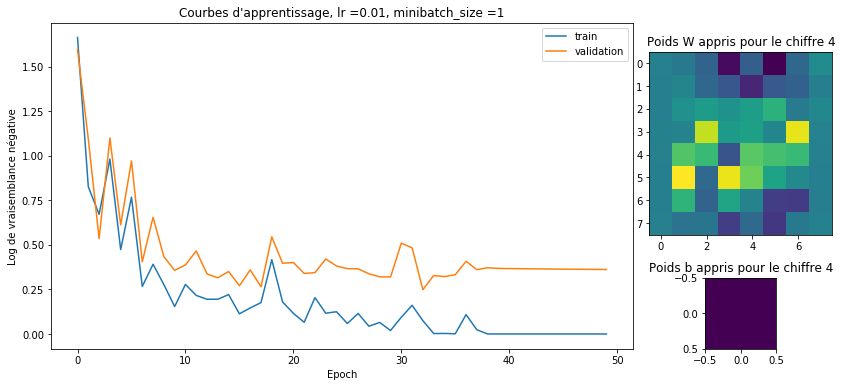

Test Number #8,	 lr: 0.01,	 minibatch_size: 20

Accuracy on validation data:0.9740740741

Accuracy on unseen data:0.9555555556



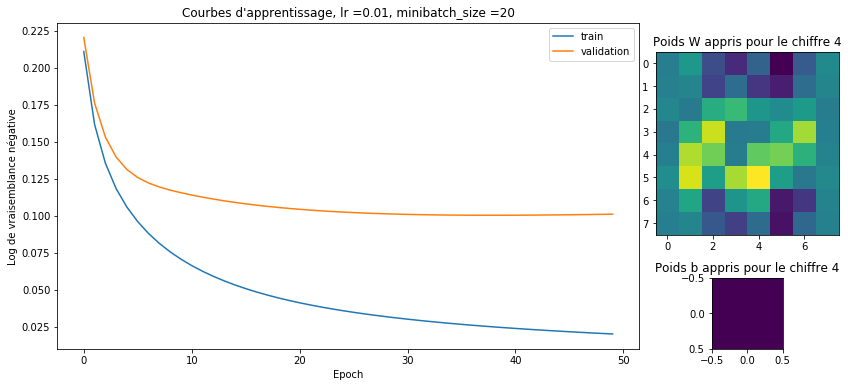

Test Number #9,	 lr: 0.01,	 minibatch_size: 200

Accuracy on validation data:0.9703703704

Accuracy on unseen data:0.9555555556



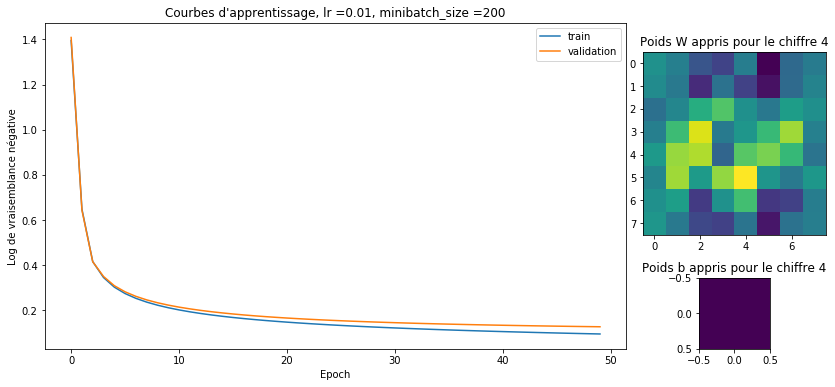

Test Number #10,	 lr: 0.01,	 minibatch_size: 1000

Accuracy on validation data:0.9629629630

Accuracy on unseen data:0.9481481481



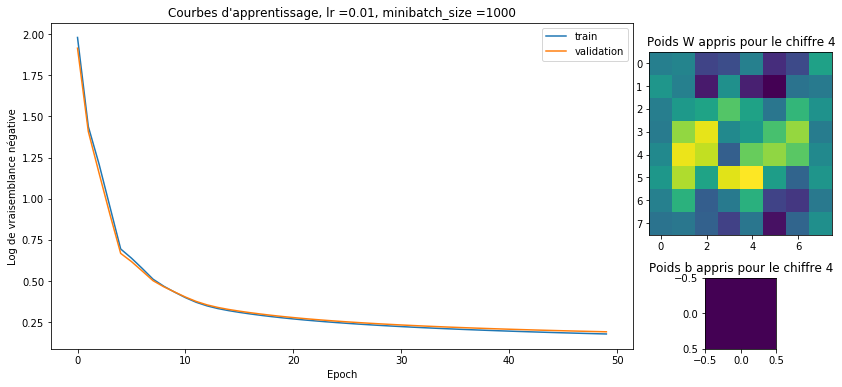

Test Number #11,	 lr: 0.001,	 minibatch_size: 89

Accuracy on validation data:0.9592592593

Accuracy on unseen data:0.9444444444



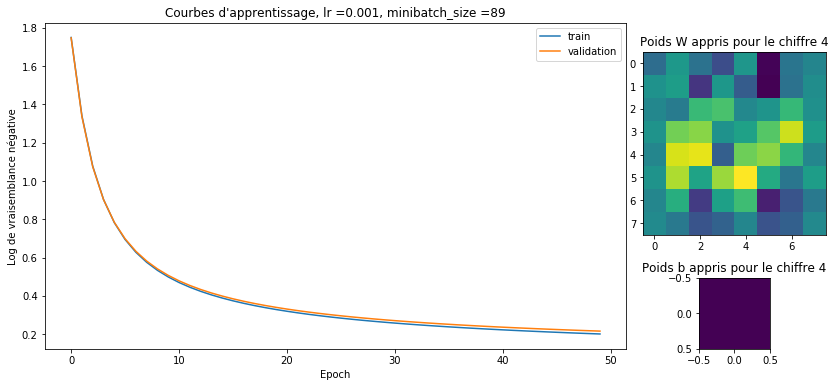

Test Number #12,	 lr: 0.001,	 minibatch_size: 1

Accuracy on validation data:0.9740740741

Accuracy on unseen data:0.9444444444



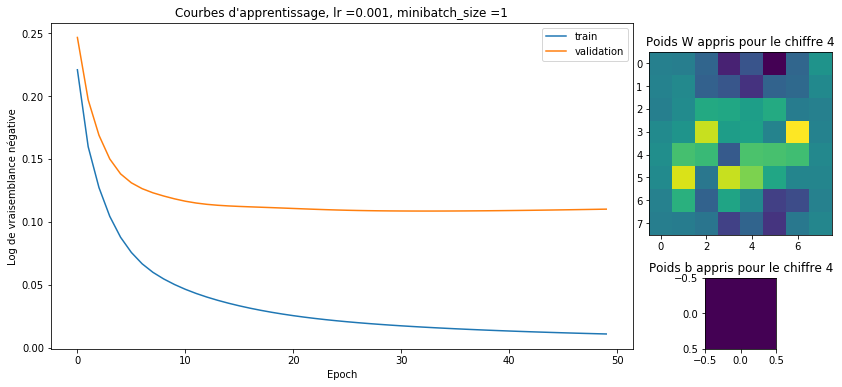

Test Number #13,	 lr: 0.001,	 minibatch_size: 20

Accuracy on validation data:0.9703703704

Accuracy on unseen data:0.9666666667



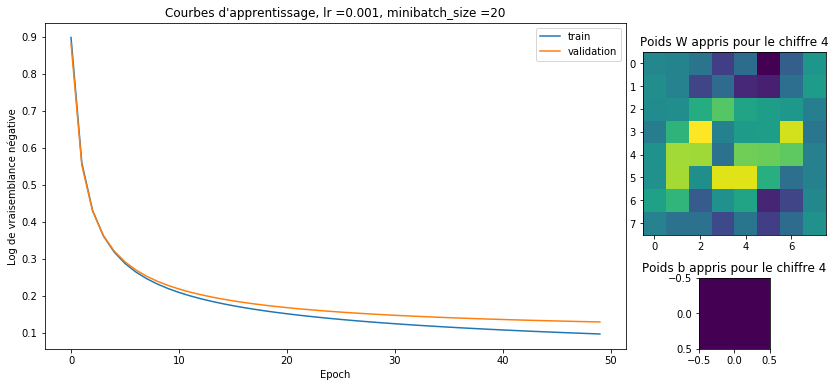

Test Number #14,	 lr: 0.001,	 minibatch_size: 200

Accuracy on validation data:0.9370370370

Accuracy on unseen data:0.9407407407



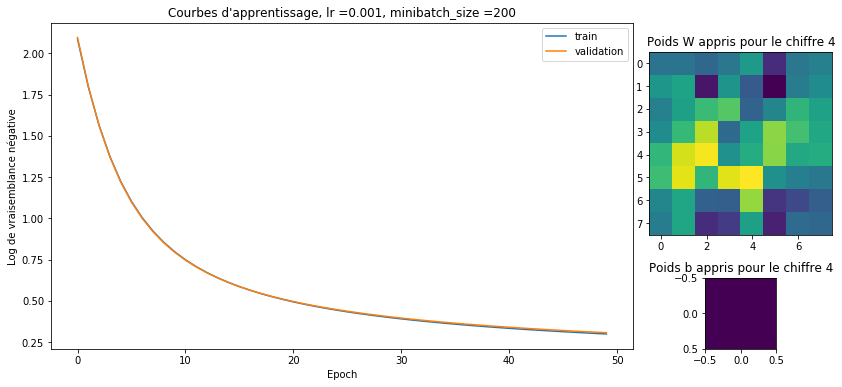

Test Number #15,	 lr: 0.001,	 minibatch_size: 1000

Accuracy on validation data:0.9037037037

Accuracy on unseen data:0.9037037037



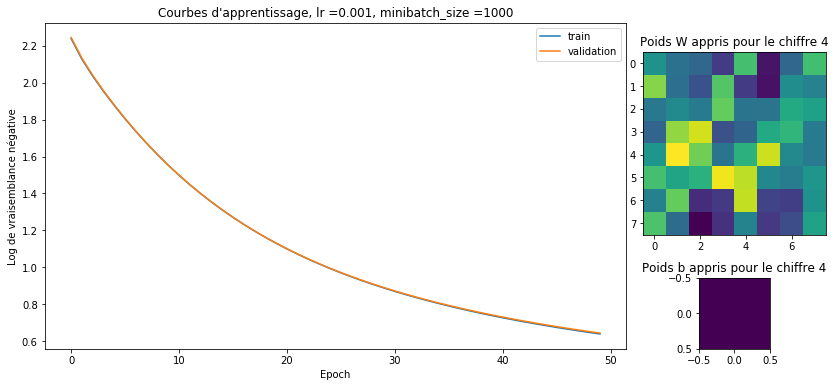



Chosen Test #2
Chosen Accuracy = 0.9740740741
Chosen learning rate = 0.1
Chosen minibatch size = 1



In [85]:
#lr = 0.001
#minibatch_size = len(y) // 20
test_nb = 0

chosen_accuracy = 0

lrs = [0.1, 0.01, 0.001]
minibatch_sizes = [len(y) // 20, 1, 20, 200, 1000]
for lr in lrs:
  for minibatch_size in minibatch_sizes:
    test_nb += 1
    print("Test Number #{},\t lr: {},\t minibatch_size: {}\n".format(test_nb,lr,minibatch_size))
    plt.figure(lrs.index(lr),figsize = (14,6))
    gridspec.GridSpec(4,8)
    losses_train, losses_val, best_theta, best_accuracy = fit(X_train,y_train,lr,minibatch_size)

    if best_accuracy > chosen_accuracy:
      chosen_accuracy = best_accuracy
      chosen_test = test_nb
      chosen_lr = lr
      chosen_minibatch_size = minibatch_size

    best_W = best_theta[:,:64]
    best_b = best_theta[:,64:]

    ax1 = plt.subplot2grid((4,8), (0,0), colspan=6, rowspan=4)
    ax1.plot(losses_train, label="train")
    ax1.plot(losses_val, label="validation")
    ax1.set_title('Courbes d\'apprentissage, lr ='+str(lr)+', minibatch_size ='+str(minibatch_size))
    ax1.set_ylabel('Log de vraisemblance négative')
    ax1.set_xlabel('Epoch')
    ax1.legend(loc='best')

    ax2 = plt.subplot2grid((4,8), (0,6),colspan=2, rowspan=3)
    ax2.imshow(best_W[4, :].reshape(8, 8))
    ax2.set_title('Poids W appris pour le chiffre 4')

    ax3 = plt.subplot2grid((4,8), (3,6),colspan=2, rowspan=1)
    ax3.imshow(best_b[4, :].reshape(1,1))
    ax3.set_title('Poids b appris pour le chiffre 4')

    plt.show()
print('\n\nChosen Test #{}\n\
Chosen Accuracy = {:.10f}\n\
Chosen learning rate = {}\n\
Chosen minibatch size = {}\n'.format(chosen_test,chosen_accuracy,chosen_lr,chosen_minibatch_size))

**Adam Partie 2**

In [0]:
# ADAM
import math


def fit_ADAM(X_train,y_train):
  alpha = 0.01
  beta_1 = 0.9
  beta_2 = 0.999						#initialize the values of the parameters
  epsilon = 1e-8

  m_t = 0
  v_t = 0 
  t = 0
  Theta = np.random.normal(0, 0.01, (len(np.unique(y)), X.shape[1]+1))  # weights of shape KxL+1 

  best_theta = None
  best_accuracy = 0
  nb_epochs = 50
  losses_train = []
  losses_val = []
  accuracies = []
  for epoch in range(nb_epochs):
      loss = 0
      accuracy = 0
      grads = []
      t+=1
      y_pred = softmax(np.dot(X_train, Theta.T)) # (y_train_mini * Theta * X_train_mini.T)
      g_t = - get_grads(y_train, y_pred, X_train)		#computes the gradient of the stochastic function
      m_t = beta_1*m_t + (1-beta_1)* g_t	#updates the moving averages of the gradient
      v_t = beta_2*v_t + (1-beta_2)* (g_t * g_t)	#updates the moving averages of the squared gradient
      m_cap = m_t/(1-(beta_1**t))		#calculates the bias-corrected estimates
      v_cap = v_t/(1-(beta_2**t))		#calculates the bias-corrected estimates
      Theta_prev = Theta								
      Theta = Theta - (alpha*m_cap)/(np.sqrt(v_cap)+epsilon)	#updates the parameters
      #if(Theta == Theta_prev):		#checks if it is converged or not
      #  print("converged")
      #  break
      # compute the loss on the train set
      loss = get_loss(y_train, softmax(np.dot(X_train, Theta.T)))
      losses_train.append(loss)
      # compute the loss on the validation set
      loss = get_loss(y_validation,softmax(np.dot(X_validation, Theta.T)))
      losses_val.append(loss)
      # compute the accuracy on the validation set
      accuracy = get_accuracy(X_validation,y_validation,Theta)
      accuracies.append(accuracy)
      if accuracy > best_accuracy:
          # select the best parameters based on the validation accuracy
          best_accuracy = accuracy
          #best_W = W
          best_theta = Theta
  accuracy_on_unseen_data = get_accuracy(X_test, y_test, best_theta) # get_accuracy(X_test, y_test, best_W)
  print("Accuracy on validation data:{:.10f}\n".format(best_accuracy))
  print("Accuracy on unseen data:{:.10f}\n".format(accuracy_on_unseen_data)) # 0.897506925208
  return losses_train,losses_val, best_theta
    

Accuracy on validation data:0.9740740741

Accuracy on unseen data:0.9555555556



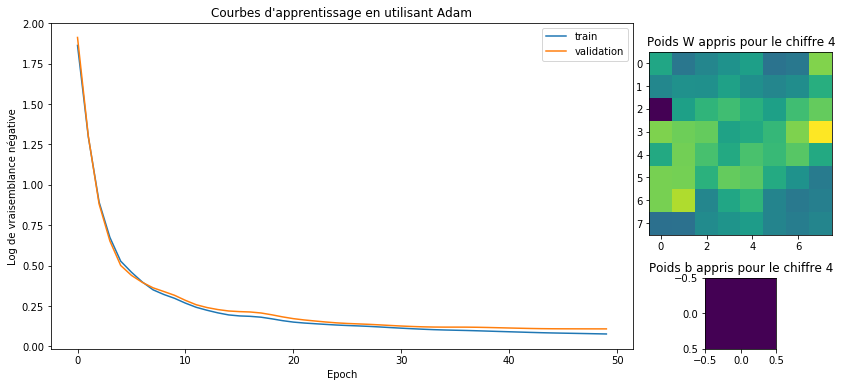

In [87]:
plt.figure(minibatch_sizes.index(minibatch_size),figsize = (14,6))
gridspec.GridSpec(4,8)
losses_train, losses_val, best_theta = fit_ADAM(X_train,y_train)

best_W = best_theta[:,:64]
best_b = best_theta[:,64:]

#ax1 = plt.subplot(131)
ax1 = plt.subplot2grid((4,8), (0,0), colspan=6, rowspan=4)
ax1.plot(losses_train, label="train")
ax1.plot(losses_val, label="validation")
ax1.set_title('Courbes d\'apprentissage en utilisant Adam')
ax1.set_ylabel('Log de vraisemblance négative')
ax1.set_xlabel('Epoch')
ax1.legend(loc='best')

#ax2 = plt.subplot(132,figsize=(4,4))
ax2 = plt.subplot2grid((4,8), (0,6),colspan=2, rowspan=3)
ax2.imshow(best_W[4, :].reshape(8, 8))
ax2.set_title('Poids W appris pour le chiffre 4')

#ax3 = plt.subplot(133,figsize=(1,1))
ax3 = plt.subplot2grid((4,8), (3,6),colspan=2, rowspan=1)
ax3.imshow(best_b[4, :].reshape(1,1))
ax3.set_title('Poids b appris pour le chiffre 4')

plt.show()